<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab01_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






[[ 0.72005783  0.56946    -0.39652494]
 [-0.02368275  0.59126692  0.80612813]]


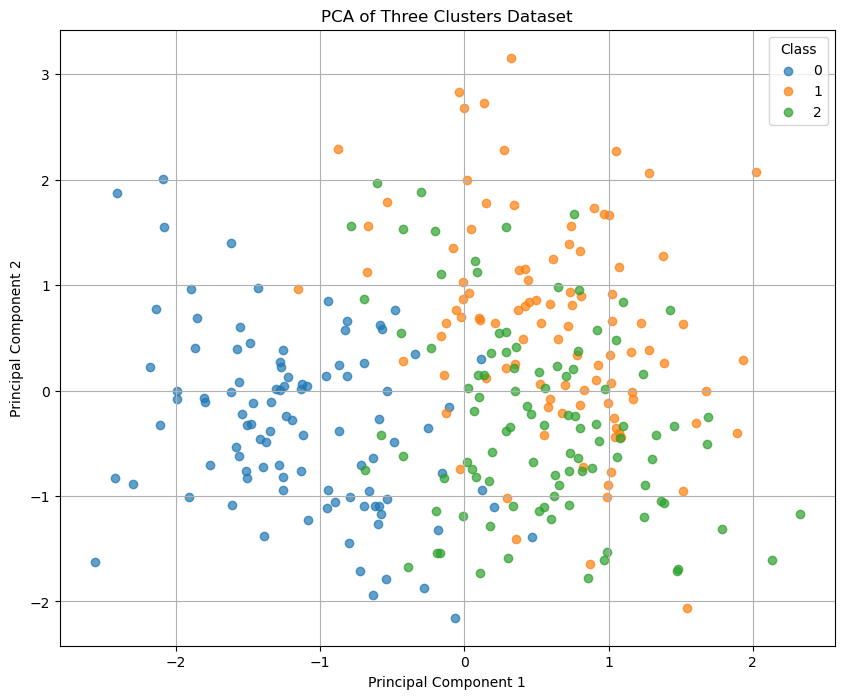

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("PCA_three_clusters_data.csv")
X = data.drop('class', axis=1)
y = data['class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

print(pca.components_)

# Plot the PCA results with color coding by class
plt.figure(figsize=(10, 8))
for i, target_name in enumerate([0, 1, 2]):
    plt.scatter(XV[y==i, 0], XV[y==i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Three Clusters Dataset")
plt.legend(title="Class")
plt.grid(True)
plt.show()

Text(0.5, 0, 'Z-axis')

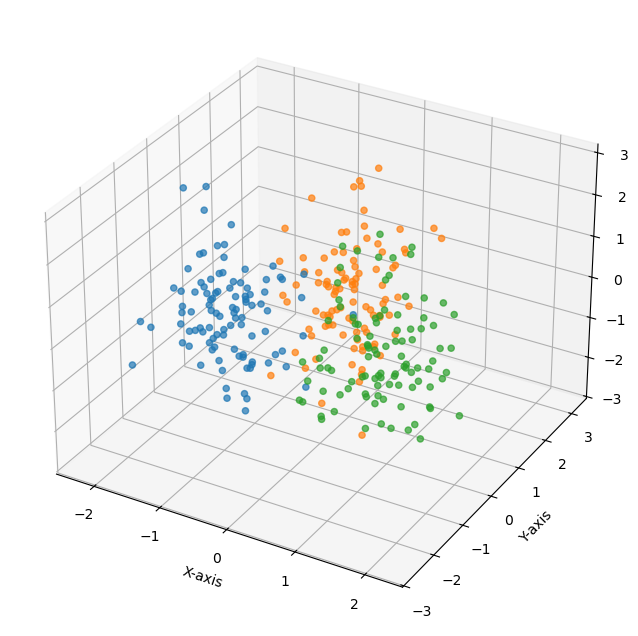

In [2]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
for i, target_name in enumerate([0, 1, 2]):
    ax.scatter(X[y==i, 0], X[y==i, 1], X[y==i, 2], label=target_name, alpha=0.7)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

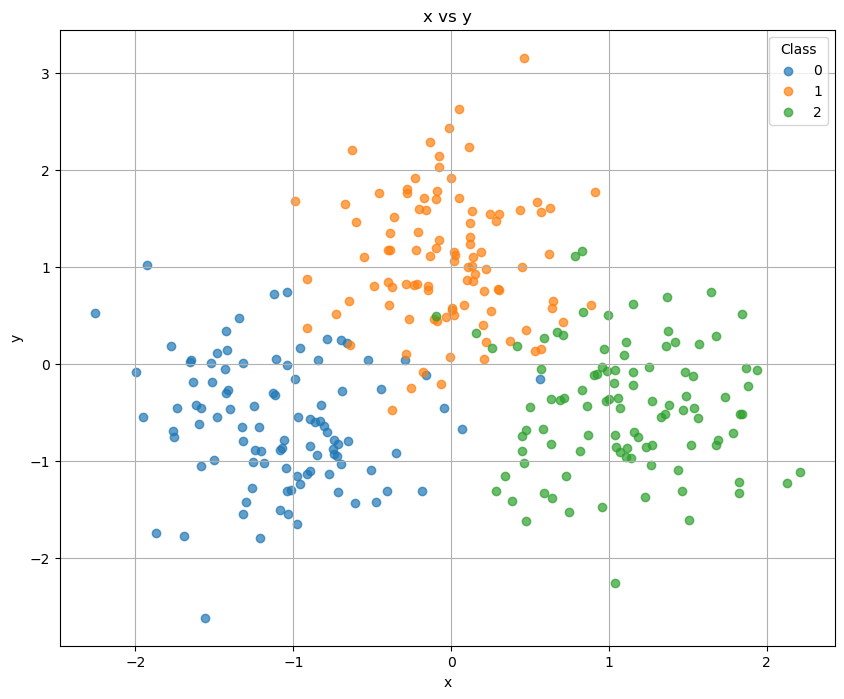

In [3]:
plt.figure(figsize=(10, 8))
for i, target_name in enumerate([0, 1, 2]):
    plt.scatter(X[y==i, 0], X[y==i, 1], label=target_name, alpha=0.7)
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.legend(title="Class")
plt.grid(True)
plt.show()

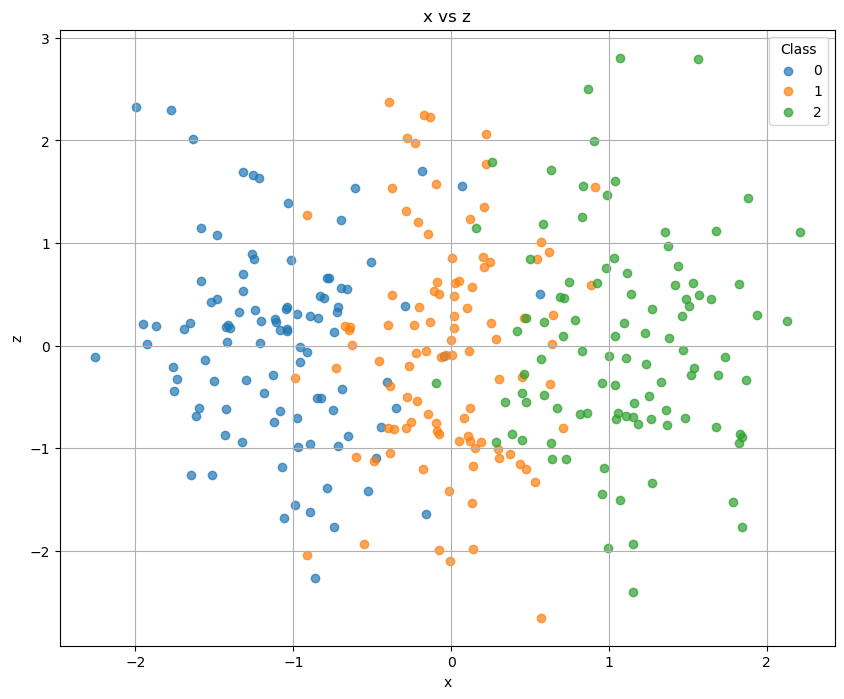

In [4]:
plt.figure(figsize=(10, 8))
for i, target_name in enumerate([0, 1, 2]):
    plt.scatter(X[y==i, 0], X[y==i, 2], label=target_name, alpha=0.7)
    
plt.xlabel("x")
plt.ylabel("z")
plt.title("x vs z")
plt.legend(title="Class")
plt.grid(True)
plt.show()

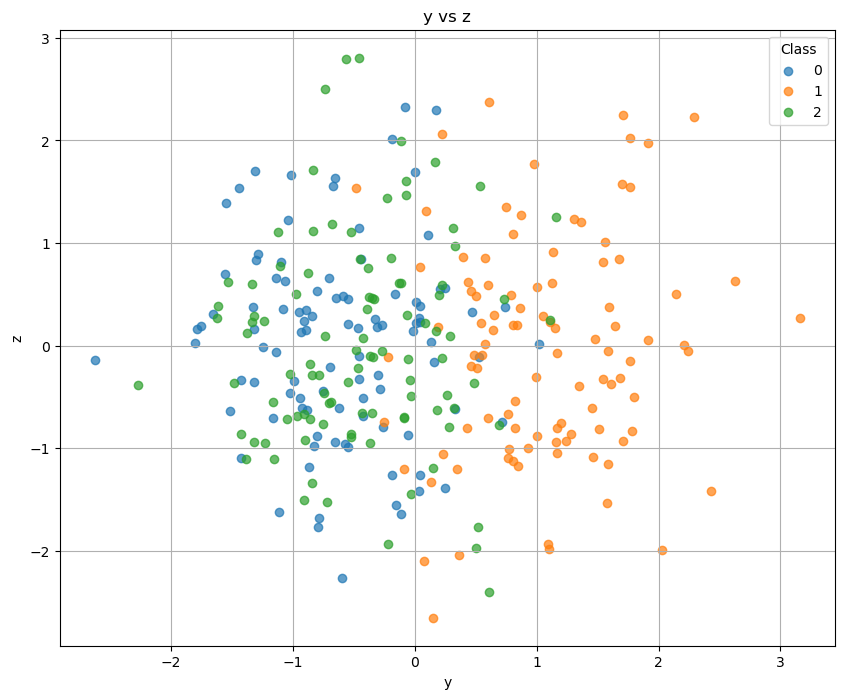

In [5]:
plt.figure(figsize=(10, 8))
for i, target_name in enumerate([0, 1, 2]):
    plt.scatter(X[y==i, 1], X[y==i, 2], label=target_name, alpha=0.7)
    
plt.xlabel("y")
plt.ylabel("z")
plt.title("y vs z")
plt.legend(title="Class")
plt.grid(True)
plt.show()

# **Answers to the questions**

## **Answer to the primary question**

Visual inspection of the plots suggests that PCA performs worse in seperating data points than plots of *x vs y* or *x vs z*, and it performs comparably to the plot of *y vs z*. That is a sensible outcome since by construction PCA is agnostic to the *class* variable and only takes into account the variability in independent variables. So without any further assumptions, PCA's good performance in clustering would be a coincidence since a priori there is no reason for dependent variable to be tied to variability in independent variables.

## **Answer to the secondary question**

Standardizing variables in PCA is important since variance is not a scale-free measure. If $X$ is a random variable and $a$ is a real number then $aX$ has variance $a^2 Var(X)$. So given a dataset we can scale any independent variable, call it $x_1$, so that the first PCA aligns closely with the direction of that variable, in mathematical terms it means that in a linear combination of independent variables that forms the PCA, the term associated with $x_1$ is close to 1 in absolute value. Such scaling does not change the "content" of the dataset yet drastically changes the PCA which defeats its purpose. Therefore, standardizing variables ensures that each variable appropriately contributes to the variance in the dataset.